In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d ruizgara/socofing

100% 838M/838M [00:11<00:00, 28.0MB/s]



In [7]:
! unzip socofing.zip

Streaming output truncated to the last 5000 lines.
  inflating: socofing/SOCOFing/Real/191__F_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_ring_finger.BMP  
  i

In [71]:
! rm -rf dataset/*.np*

In [8]:
! git clone https://github.com/kairess/fingerprint_recognition.git

Cloning into 'fingerprint_recognition'...
remote: Enumerating objects: 37, done.
remote: Total 37 (delta 0), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (37/37), done.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import pickle
import random

# for colab
# from google.colab.patches import cv2_imshow

In [3]:
print(tf.version.VERSION)

2.3.0


**Preprocessing**

In [72]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

6000


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


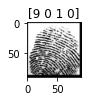

In [74]:
img_list = sorted(glob.glob('socofing/SOCOFing/Real/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90,3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (90, 90))
    imgs[i] = img
    8
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.savez('dataset/x_real.npz', data=imgs)
np.save('dataset/y_real.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17931


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


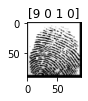

In [75]:
img_list = sorted(glob.glob('socofing/SOCOFing/Altered/Altered-Easy/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90,3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (90, 90))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_easy.npz', data=imgs)
np.save('dataset/y_easy.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17067


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


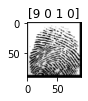

In [76]:
img_list = sorted(glob.glob('socofing/SOCOFing/Altered/Altered-Medium/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90,3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (90, 90))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_medium.npz', data=imgs)
np.save('dataset/y_medium.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

14272


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


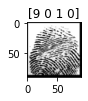

In [78]:
img_list = sorted(glob.glob('socofing/SOCOFing/Altered/Altered-Hard/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90,3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (90, 90))
    
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_hard.npz', data=imgs)
np.save('dataset/y_hard.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

**Train Section**

---



Load Dataset


C:\Users\OmarAyman\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


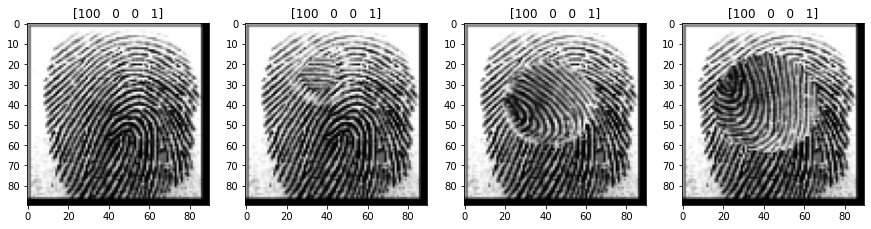

In [2]:
x_real = np.load('dataset/x_real.npz')['data']
y_real = np.load('dataset/y_real.npy')
x_easy = np.load('dataset/x_easy.npz')['data']
y_easy = np.load('dataset/y_easy.npy')
x_medium = np.load('dataset/x_medium.npz')['data']
y_medium = np.load('dataset/y_medium.npy')
x_hard = np.load('dataset/x_hard.npz')['data']
y_hard = np.load('dataset/y_hard.npy')



plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')

Train Test Split

In [3]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)

print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)

(49270, 90, 90, 3) (49270, 4)
(44343, 90, 90, 3) (44343, 4)
(4927, 90, 90, 3) (4927, 4)


Preview Augmentation

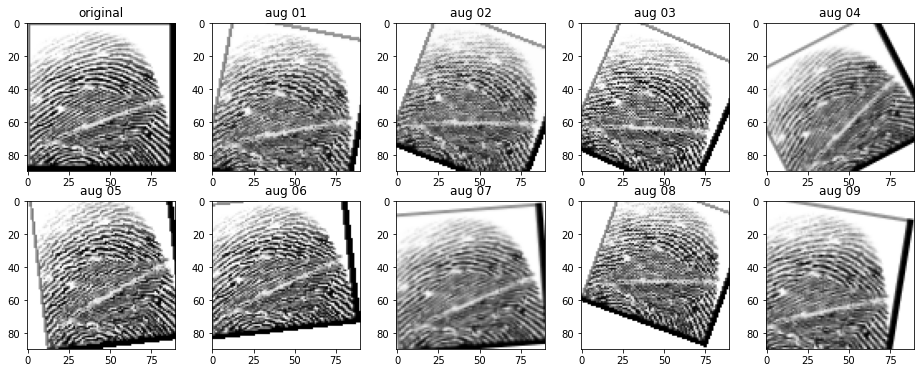

In [4]:
augs = [x_data[40000]] * 9

seq = iaa.Sequential([
    # blur images with a sigma of 0 to 0.5
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        # scale images to 90-110% of their size, individually per axis
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        # translate by -10 to +10 percent (per axis)
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        # rotate by -30 to +30 degrees
        rotate=(-30, 30),
        # use nearest neighbour or bilinear interpolation (fast)
        order=[0, 1],
        # if mode is constant, use a cval between 0 and 255
        cval=255
    )
], random_order=True)

augs = seq.augment_images(augs)

plt.figure(figsize=(16, 6))
plt.subplot(2, 5, 1)
np.set_printoptions(threshold=np.inf)


# change cv2.imshow ith cv2_imshow in colab

plt.title('original')
plt.imshow(x_data[40000].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2, 5, i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')

In [5]:
label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i

Configure 

In [6]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        'Initialization'
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict
        
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]
        
        x2_batch = np.empty((self.batch_size, 90, 90, 3), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)
        
        # augmentation
        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    order=[0, 1],
                    cval=255
                )
            ], random_order=True)

            x1_batch = seq.augment_images(x1_batch)
        
        # pick matched images(label 1.0) and unmatched images(label 0.0) and put together in batch
        # matched images must be all same, [subject_id(3), gender(1), left_right(1), finger(1)], e.g) 034010
        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)

            if random.random() > 0.5:
                # put matched image
                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.
            else:
                # put unmatched image
                while True:
                    unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))

                    if unmatch_key != match_key:
                        break

                x2_batch[i] = self.x_real[unmatch_idx]
                y_batch[i] = 0.

        return [x1_batch.astype(np.float32) / 255., x2_batch.astype(np.float32) / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [7]:
train_gen = DataGenerator(x_train, label_train, x_real, label_real_dict, shuffle=True)
val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, shuffle=False)

Create Model

In [8]:
x1 = layers.Input(shape=(90, 90, 3))
x2 = layers.Input(shape=(90, 90, 3))

# share weights both inputs
inputs = layers.Input(shape=(90, 90, 3))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)

# 2 feature models that sharing weights
x1_net = feature_model(x1)
x2_net = feature_model(x2)

# subtract features
net = layers.Subtract()([x1_net, x2_net])

net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 90, 90, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 90, 90, 3)]  0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 22, 22, 32)   10144       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
subtract (Subtract)             (None, 22, 22, 32)   0           functional_1[0][0]    

Train the model

In [ ]:
history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)


Save the Model

In [2]:
model.save('modelt')

NameError: name 'model' is not defined

Load the Model

In [24]:
model = keras.models.load_model('model')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [20]:
modelName = 'Model.sav'
model = pickle.load(open(modelName,'rb'))


ModuleNotFoundError: No module named 'keras.saving'

[[0.99968123]]


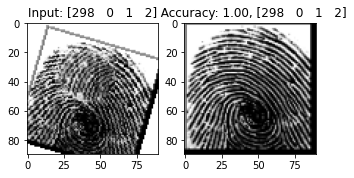

In [159]:
# new user fingerprint input //  
random_idx = random.randint(0, len(x_val))

random_img = x_val[random_idx]
random_label = label_val[random_idx]

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img = seq.augment_image(random_img).reshape((1, 90, 90, 3)).astype(np.float32) / 255.

# matched image
match_key = random_label.astype(str)
match_key = ''.join(match_key).zfill(6)


rx = x_real[label_real_dict[match_key]].reshape((1, 90, 90, 3)).astype(np.float32) / 255.
ry = y_real[label_real_dict[match_key]]



pred_rx = model.predict([random_img, rx])


# unmatched image
# unmatch_key, unmatch_idx = random.choice(list(label_real_dict.items()))

# ux = x_real[unmatch_idx].reshape((1, 90, 90, 3)).astype(np.float32) / 255.
# uy = y_real[unmatch_idx]

# pred_ux = model.predict([random_img, ux])


print(pred_rx)
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('  Accuracy: %.02f, %s' % (pred_rx, ry))
plt.imshow(rx.squeeze(), cmap='gray')
# plt.subplot(1, 3, 3)
# plt.title('X: %.02f, %s' % (pred_ux, uy))
# plt.imshow(ux.squeeze(), cmap='gray')